# Outline<a class="anchor" id="outline"></a>
   [1. Background](#background)<br>
   
   [2. Data Section](#data)<br>
   - [Step 1: Import Package Dependencies](#package)<br>
   - [Step 2: Import Data](#import)<br>
   - [Step 3:Train/Test Split](#split)<br>
  
   [3. Classification Modeling](#model)
   - [SVM](#SVM)
   - [Logistic Model](#logistic)
   - [Pick a "winning" model](#pick)
   - [Careful evaluation of winning model performance measures](#evaluate)

# Background<a class="anchor" id="background">
[Go to Top](#outline)

**Target Variable:** approved

**Background:** A large regional bank wants to predict whether customer loan applications can be approved based on past customer data, including factors such as gender, age, occupation, marital status, and others.  

# Data Section<a class="anchor" id="data">
[Go to Top](#outline)
> **Step 1:** Import Package Dependencies
    
> **Step 2:** Import Data
    
> **Step 3:** Train/Test Split

## Step 1: Import Package Dependencies<a class="anchor" id="package">

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

## Step 2: Import data<a class="anchor" id="import">

In [2]:
df = pd.read_csv("loan_approval.csv")

In [3]:
df.head()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,...,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,30.83,0.000,1,1,1,0,0,0,...,0,1.25,1,1,1,0,1,0,0,0
1,1,0,58.67,4.460,1,1,0,1,0,0,...,0,3.04,1,1,6,0,1,0,0,560
2,1,0,24.50,0.500,1,1,0,1,0,0,...,0,1.50,1,0,0,0,1,0,0,824
3,1,1,27.83,1.540,1,1,1,0,0,0,...,0,3.75,1,1,5,1,1,0,0,3
4,1,1,20.17,5.625,1,1,1,0,0,0,...,0,1.71,1,0,0,0,0,1,0,0


In [4]:
df.columns

Index(['approved', 'gender', 'age', 'debt', 'married', 'bank_customer',
       'emp_industrial', 'emp_materials', 'emp_consumer_services',
       'emp_healthcare', 'emp_financials', 'emp_utilities', 'emp_education',
       'ethnicity_white', 'ethnicity_black', 'ethnicity_latino',
       'ethnicity_asian', 'ethnicity_other', 'years_employed', 'prior_default',
       'employed', 'credit_score', 'drivers_license', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary', 'Income'],
      dtype='object')

## Step 3: Train/Test Split<a class="anchor" id="split">

In [1]:
X = df.drop(columns=['approved'])
y = df['approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

NameError: name 'df' is not defined

# Classification Modeling<a class="anchor" id="model">
[Go to Top](#outline)
### SVM
- **Step 1:** Find the best C value<br>
- **Step 2:** Train the final SVM model<br>
- **Step 3:** Table of Performance Measures<br>
    
    
### Logistic Model
- **Step 1:** Train a Logistic model
- **Step 2:** Table of Performance Measures

### Pick a "winning" model

### Careful evaluation of winning model performance measures

## SVM<a class="anchor" id="SVM">

### Step 1: Find the best C value

In [9]:
# Define the range of C values to be tested
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
f1_scores_class1 = []

# Loop over each value of C to train the SVM model and evaluate performance
for C in C_values:
    svm_model_loop = SVC(C=C, kernel='poly')
    svm_model_loop.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred_train_loop = svm_model_loop.predict(X_train)
    y_pred_test_loop = svm_model_loop.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_pred_train_loop))
    test_accuracies.append(accuracy_score(y_test, y_pred_test_loop))
    f1_scores_class1.append(f1_score(y_test, y_pred_test_loop, pos_label=1))

# Compile results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'C_value': C_values,
    'Train_Accuracy': train_accuracies,
    'Test_Accuracy': test_accuracies,
    'F1_Score_Class1': f1_scores_class1
})

results_df

,C_value,Train_Accuracy,Test_Accuracy,F1_Score_Class1
0,0.0001,0.546584,0.599034,0.045977
1,0.0010,0.550725,0.608696,0.089888
2,0.0100,0.559006,0.618357,0.131868
3,0.1000,0.569358,0.632850,0.191489
4,1.0000,0.579710,0.628019,0.222222
5,10.0000,0.585921,0.623188,0.220000
6,100.0000,0.592133,0.647343,0.304762
7,1000.0000,0.592133,0.642512,0.288462
8,10000.0000,0.592133,0.642512,0.288462


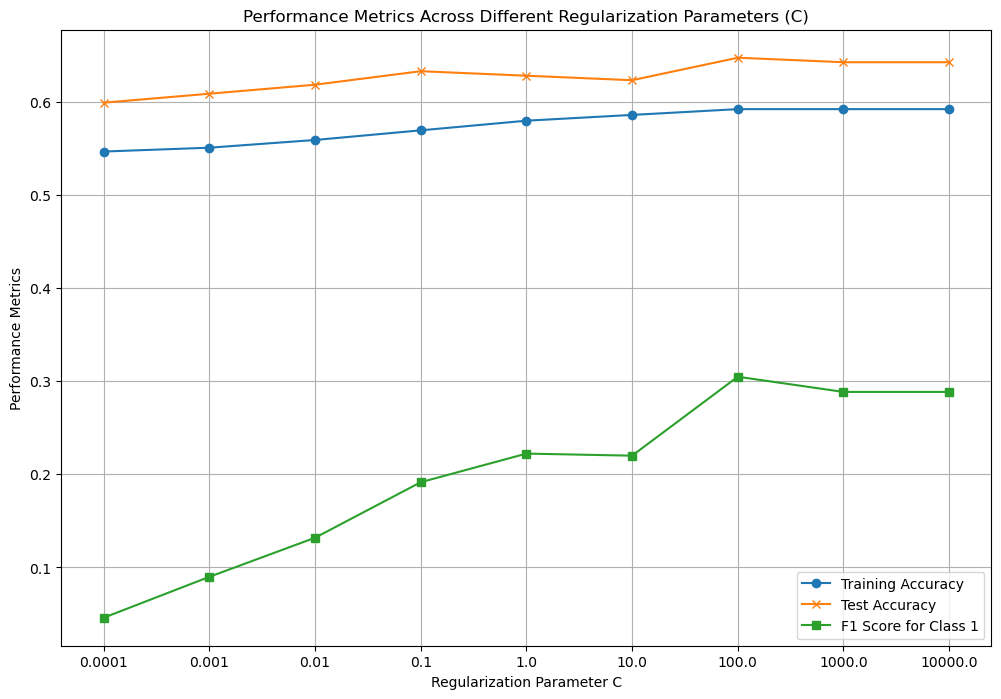

In [10]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Plotting the metrics
plt.plot(results_df['C_value'], results_df['Train_Accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['C_value'], results_df['Test_Accuracy'], marker='x', label='Test Accuracy')
plt.plot(results_df['C_value'], results_df['F1_Score_Class1'], marker='s', label='F1 Score for Class 1')

# Annotate the plot
plt.xlabel('Regularization Parameter C')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics Across Different Regularization Parameters (C)')
plt.xscale('log')
plt.xticks(results_df['C_value'], labels=results_df['C_value'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### **Conclusion:** 
Regard '100' as the best C value because the model has the highest performance when C value = 100.

## Step 2: Train the final SVM model

In [11]:
c_value = 100

# Initialize and train the SVM model and a polynomial kernel
svm_model_poly = SVC(C=c_value, kernel='poly')
svm_model_poly.fit(X_train, y_train)

SVC(C=100, kernel='poly')

## Step 3: Table of Performance Measures

In [16]:
svm_model_poly = SVC(C=100, kernel='poly')
svm_model_poly.fit(X_train, y_train)

# Predictions and evaluation
y_pred_train_poly = svm_model_poly.predict(X_train)
y_pred_test_poly = svm_model_poly.predict(X_test)

train_accuracies = accuracy_score(y_train, y_pred_train_poly)
test_accuracies = accuracy_score(y_test, y_pred_test_poly)
f1_scores_class1 = f1_score(y_test, y_pred_test_poly, pos_label=1)

print(f"""
    Train_Accuracy: {train_accuracies},
    Test_Accuracy: {test_accuracies},
    F1_Score_Class1: {f1_scores_class1}""")


    Train_Accuracy: 0.5921325051759835,
    Test_Accuracy: 0.6473429951690821,
    F1_Score_Class1: 0.3047619047619048


## Logistic Model<a class="anchor" id="logistic">

## Step 1: Train a Logistic model

In [17]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

/Users/homerliu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 2: Tabel of Performance Measures

In [18]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy of Logistic Model: {accuracy}")
print(" ")
print(classification_rep)

Accuracy of Logistic Model: 0.8840579710144928
 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       122
           1       0.81      0.93      0.87        85

    accuracy                           0.88       207
   macro avg       0.88      0.89      0.88       207
weighted avg       0.89      0.88      0.88       207



## Pick a "winning" model<a class="anchor" id="pick">
> Based on the various performance measures, decide which of the two modeling frameworks (SVM or Logistic) to move forward with. 

In my opinion, **Logistic Regression model** has better performance because the f1 score of Logistic Regression is about 0.88, but the f1 score of SVM is about 0.30. As a result, I prefer the model of Logistic Regression.

## Careful evaluation of winning model performance measures<a class="anchor" id="evaluate">

### Probability Threshold

In [24]:
# Replace these with your actual predicted probabilities and true labels
predicted_probabilities = y_pred_test_poly
true_labels = y_test

# Define the range of probability thresholds
# Thresholds will range from 0 to 0.4 with an interval of 0.05
thresholds = np.arange(0, 0.41, 0.05)

# Initialize an empty DataFrame to store performance metrics
performance_df = pd.DataFrame(columns=['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy'])

# Iterate over each probability threshold, calculate performance metrics, and append to the DataFrame
for threshold in thresholds:
    # Convert predicted probabilities to binary predictions using the probability threshold
    binary_predictions = (predicted_probabilities >= threshold).astype(int)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate other performance metrics
    precision = precision_score(true_labels, binary_predictions)
    recall = recall_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    accuracy = accuracy_score(true_labels, binary_predictions)
    
    # Append a new row to the DataFrame
    performance_df = performance_df.append({
        'Threshold': threshold,
        'TN': tn,
        'TP': tp,
        'FN': fn,
        'FP': fp,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Accuracy': accuracy
    }, ignore_index=True)

/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8187/409917594.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8187/409917594.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8187/409917594.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8187/409917594.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_d

In [25]:
performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.00,0.0,85.0,0.0,122.0,0.410628,1.000000,0.582192,0.410628
1,0.05,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
2,0.10,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
3,0.15,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
4,0.20,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
5,0.25,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
6,0.30,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
7,0.35,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343
8,0.40,118.0,16.0,69.0,4.0,0.800000,0.188235,0.304762,0.647343


### Result 1: Threshold = 0.2

In [21]:
threshold_value = 0.2
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.2
There is/are 4.0 false positive.
There is/are 69.0 false negaive.


### False Positive

- Meaning:<br>

> In the case of customers whose loan applications were not actually approved, the predictive model incorrectly classified 4 customers as eligible for approval.

- Potential costs to the business<br>

> Such errors in judgment may lead to the regional bank overestimating the loan repayment ability of customers. Consequently, the bank might **face challenges in successfully recovering the monthly loan amounts from customers.**

### False Negative
- Meaning<br>

> In the case of customers whose loan applications were actually approved, the predictive model incorrectly classified 69 customers as unable to pass the application successfully.

- Potential costs to the business<br>

> Such errors in judgment may result in eligible customers seeking loans from other banks, leading to a high probability of **customer attrition and a decrease in the bank's market share.**

### More costly prediction mistakes
- In my opinion, **false negative may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market. To be specific, there's a possibility of gradually being phased out in the market competition due to these errors.

### Result 2: Threshold = 0.25

In [22]:
threshold_value = 0.25
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.25
There is/are 4.0 false positive.
There is/are 69.0 false negaive.


### False Positive

- Meaning:<br>

> In the case of customers whose loan applications were not actually approved, the predictive model incorrectly classified 4 customers as eligible for approval.

- Potential costs to the business<br>

> Such errors in judgment may lead to the regional bank overestimating the loan repayment ability of customers. Consequently, the bank might **face challenges in successfully recovering the monthly loan amounts from customers.**

### False Negative
- Meaning<br>

> In the case of customers whose loan applications were actually approved, the predictive model incorrectly classified 69 customers as unable to pass the application successfully.

- Potential costs to the business<br>

> Such errors in judgment may result in eligible customers seeking loans from other banks, leading to a high probability of **customer attrition and a decrease in the bank's market share.**

### More costly prediction mistakes
- In my opinion, **false negative may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market. To be specific, there's a possibility of gradually being phased out in the market competition due to these errors.

### Result 3: Threshold = 0

In [26]:
threshold_value = 0
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0
There is/are 122.0 false positive.
There is/are 0.0 false negaive.


### False Positive

- Meaning:<br>

> In the case of customers whose loan applications were not actually approved, the predictive model incorrectly classified 122 customers as eligible for approval.

- Potential costs to the business<br>

> Such errors in judgment may lead to the regional bank overestimating the loan repayment ability of customers. Consequently, the bank might **face challenges in successfully recovering the monthly loan amounts from customers.**

### False Negative
- Meaning<br>

> In the actual list of customers who were successfully granted loans, the predictive model did not make any errors in classifying anyone as ineligible for a successful loan application.

- Potential costs to the business<br>

> Such errors in judgment may result in eligible customers seeking loans from other banks, leading to a high probability of **customer attrition and a decrease in the bank's market share.**

### More costly prediction mistakes
- In my opinion, **false negative may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market. To be specific, there's a possibility of gradually being phased out in the market competition due to these errors.

## Recommend Probability Threshold
- In this case, I reccomend the probability threshold ≥ 0.05 because the performance which are bigger than 0.05 are the same.